# Matplotlib图鉴——基础散点图

## 公众号：可视化图鉴

In [57]:
import matplotlib
print(matplotlib.__version__) #查看Matplotlib版本
import pandas as pd
print(pd.__version__) #查看pandas版本
import numpy as np
print(np.__version__) #查看numpy版本
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif'] = ['SimHei']  #设置中文

3.3.2
1.2.0
1.19.2


注意，代码在以下环境全部通过测试:
- Python 3.7.1
- Matplotlib == 3.3.2
- pandas == 1.2.0
- numpy == 1.19.2

因版本不同，可能会有部分语法差异，如有报错，请先检查拼写及版本是否一致！

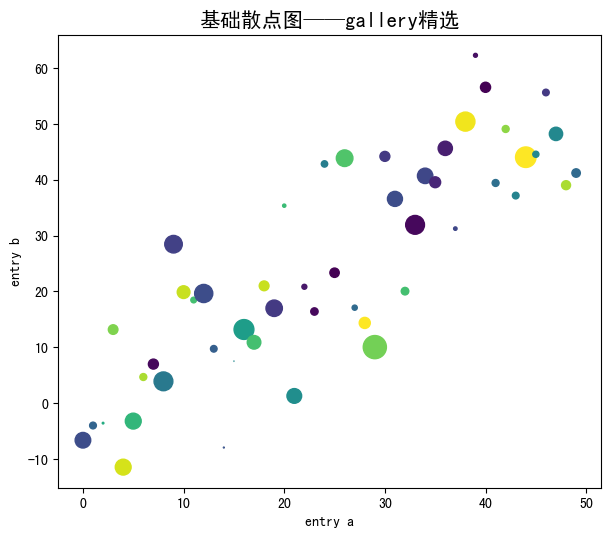

In [5]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.figure(figsize = (7,6),dpi = 100)

plt.title("基础散点图——gallery精选",fontsize = 15)

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

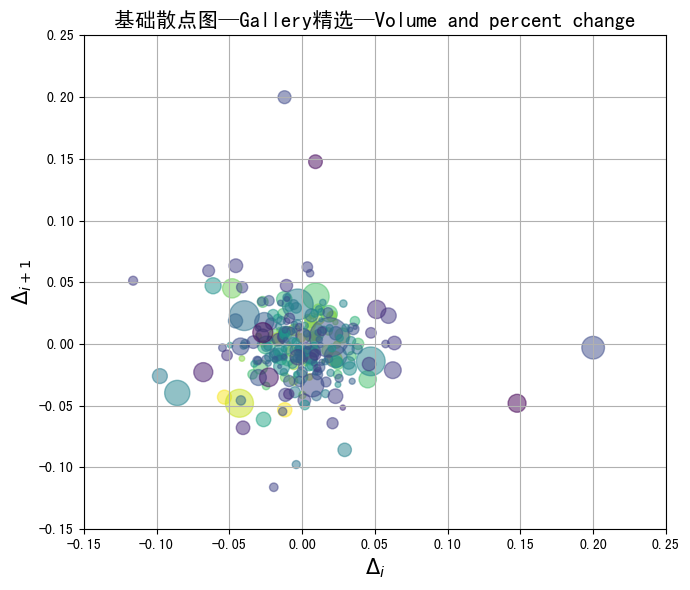

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook


with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]


volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots(figsize = (7,6),dpi = 100)
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('基础散点图—Gallery精选—Volume and percent change', fontsize=15)

ax.set_ylim(-0.15,0.25)
ax.set_yticks([-0.15,-0.1,-0.05,0,0.05,0.1,0.15,0.2,0.25])


ax.set_xlim(-0.15,0.25)
ax.set_xticks([-0.15,-0.1,-0.05,0,0.05,0.1,0.15,0.2,0.25])

ax.grid(True)
fig.tight_layout()

plt.show()

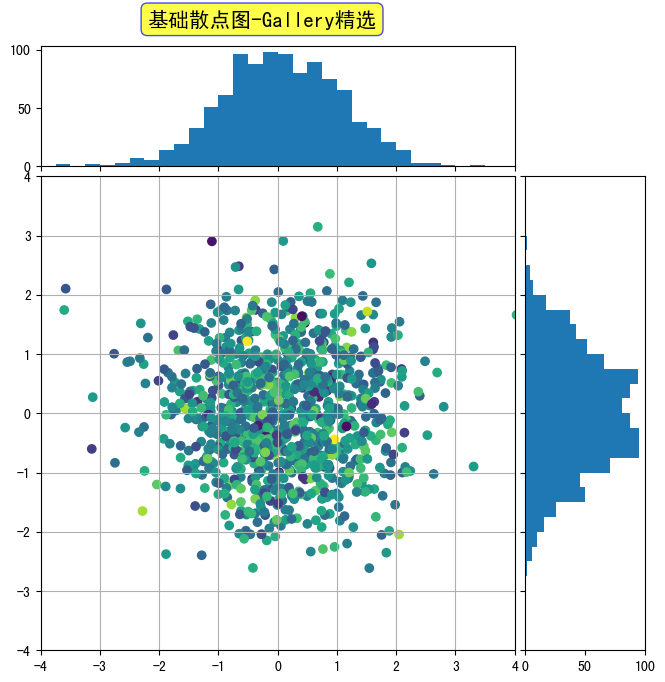

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

np.random.seed(19680801)


x = np.random.randn(1000)
y = np.random.randn(1000)


fig, axScatter = plt.subplots(figsize=(9,8),dpi = 100)

axScatter.scatter(x, y,c = np.random.randn(1000))
axScatter.set_aspect(1.)
axScatter.grid()

axScatter.set_xlim(-4,4)
axScatter.set_ylim(-4,4)

divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 1.2, pad=0.1, sharex=axScatter)
axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=axScatter)

axHistx.xaxis.set_tick_params(labelbottom=False)
axHisty.yaxis.set_tick_params(labelleft=False)

binwidth = 0.25
xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
lim = (int(xymax/binwidth) + 1)*binwidth

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')


axHistx.set_yticks([0, 50, 100])

axHisty.set_xticks([0, 50, 100])

axHistx.text(-2.2,120,"基础散点图-Gallery精选",fontsize = 15,bbox=dict(boxstyle='round', fc='yellow', ec='blue',lw=1 ,alpha=0.7))

plt.show()
